In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Wine_clust.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [3]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
data.shape

(178, 13)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [143]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


# Managing Outliers

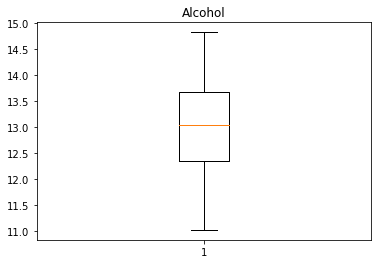

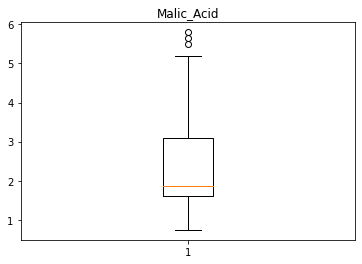

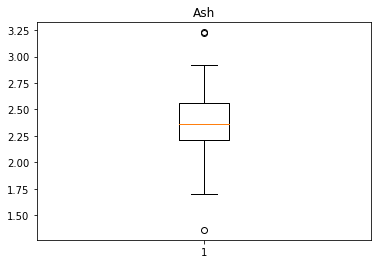

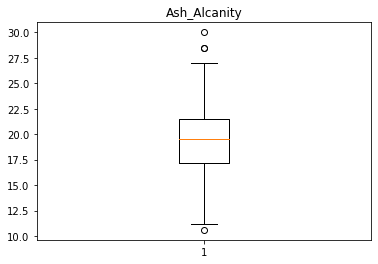

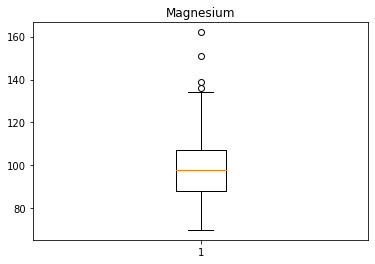

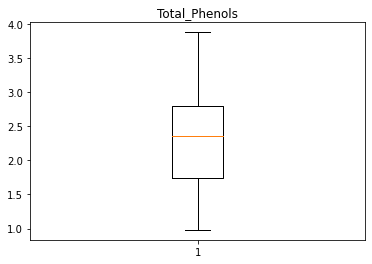

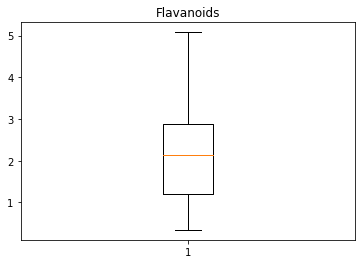

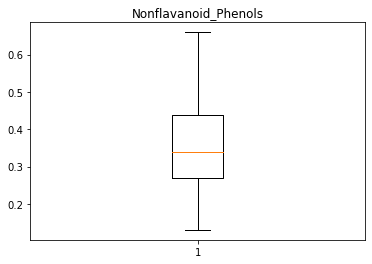

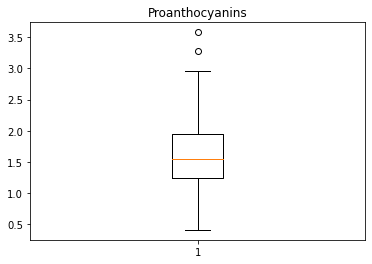

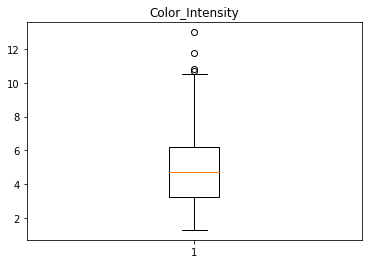

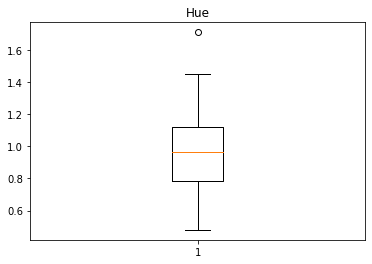

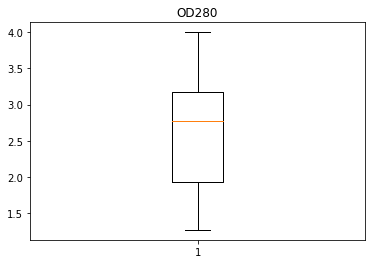

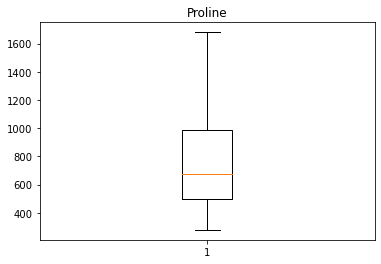

In [36]:

for i in ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [37]:
#Handling outliers:
#Malic_Acid
Q1=np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(data['Malic_Acid'],75,interpolation='midpoint')

In [51]:
IQR=Q3-Q1
IQR

1.46

In [41]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
outlier1 = []

In [43]:
for x in data['Malic_Acid']:
    if((x>up_lim) or (x<low_lim)):
        outlier1.append(x)

In [44]:
outlier1

[5.8, 5.51, 5.65]

In [45]:
ind1=data['Malic_Acid']>up_lim
data.loc[ind1].index 

Int64Index([123, 137, 173], dtype='int64')

In [46]:
data.drop([123,137,173],inplace=True)

In [52]:
#Ash:
Q1=np.percentile(data['Ash'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash'],75,interpolation='midpoint')

In [54]:
IQR=Q3-Q1

In [57]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
outlier= []

In [58]:
for x in data['Ash']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [60]:
ind1=data['Ash']<low_lim
data.loc[ind1].index

Int64Index([59], dtype='int64')

In [61]:
ind1=data['Ash']>up_lim
data.loc[ind1].index 

Int64Index([25, 121], dtype='int64')

In [62]:
data.drop([59,25,121],inplace=True)

In [72]:
#Ash_Alcanity:
Q1=np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')

In [73]:
IQR=Q3-Q1

In [74]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
outlier2= []

In [75]:
for x in data['Ash_Alcanity']:
    if((x>up_lim) or (x<low_lim)):
        outlier2.append(x)

In [76]:
outlier2

[30.0, 28.5]

In [77]:
ind1=data['Ash_Alcanity']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [78]:
ind1=data['Ash_Alcanity']>up_lim
data.loc[ind1].index 

Int64Index([73, 127], dtype='int64')

In [79]:
data.drop([73,127],inplace=True)

In [93]:
#Magnesium:
Q1=np.percentile(data['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(data['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(data['Magnesium'],75,interpolation='midpoint')

In [94]:
IQR=Q3-Q1
IQR

19.0

In [95]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)


In [96]:
outlier3= []
for x in data['Magnesium']:
    if((x>up_lim) or (x<low_lim)):
        outlier3.append(x)

In [97]:
outlier3

[151, 136, 162]

In [98]:
ind1=data['Magnesium']>up_lim
data.loc[ind1].index 

Int64Index([69, 78, 95], dtype='int64')

In [99]:
data.drop([69,78,95],inplace=True)

In [101]:
#Proanthocyanins:
Q1=np.percentile(data['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(data['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(data['Proanthocyanins'],75,interpolation='midpoint')

In [102]:
IQR=Q3-Q1
IQR

0.6749999999999998

In [106]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

In [107]:
outlier4= []
for x in data['Proanthocyanins']:
    if((x>up_lim) or (x<low_lim)):
        outlier4.append(x)

In [108]:
outlier4

[2.96, 3.58]

In [110]:
ind1=data['Proanthocyanins']>up_lim
data.loc[ind1].index 

Int64Index([14, 110], dtype='int64')

In [111]:
data.drop([14,110],inplace=True)

In [115]:
#Color_Intensity:
Q1=np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(data['Color_Intensity'],75,interpolation='midpoint')

In [116]:
IQR=Q3-Q1
IQR

2.98

In [117]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

In [118]:
outlier5= []
for x in data['Color_Intensity']:
    if((x>up_lim) or (x<low_lim)):
        outlier5.append(x)

In [119]:
outlier5

[10.8, 13.0, 11.75]

In [120]:
ind1=data['Color_Intensity']>up_lim
data.loc[ind1].index 

Int64Index([151, 158, 159], dtype='int64')

In [121]:
data.drop([151,158,159],inplace=True)

In [122]:
#Hue:
Q1=np.percentile(data['Hue'],25,interpolation='midpoint')
Q2=np.percentile(data['Hue'],50,interpolation='midpoint')
Q3=np.percentile(data['Hue'],75,interpolation='midpoint')

In [123]:
IQR=Q3-Q1
IQR

0.32500000000000007

In [124]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

In [125]:
outlier6= []
for x in data['Hue']:
    if((x>up_lim) or (x<low_lim)):
        outlier6.append(x)

In [126]:
outlier6

[1.71]

In [127]:
ind1=data['Hue']>up_lim
data.loc[ind1].index 

Int64Index([115], dtype='int64')

In [128]:
data.drop([115],inplace=True)

# Kmean:

In [129]:
from sklearn.cluster import KMeans
wcss=[]

In [130]:
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [131]:
wcss

[16188555.340349523,
 4040536.7356572137,
 2091944.4170953613,
 1197934.6970813845,
 801478.885710718,
 571001.2363898355,
 361093.63079508225,
 290164.36039409507,
 239840.7082265319,
 192601.7280070637,
 160617.22208520042,
 135621.52802655348,
 115296.7535107152]

In [132]:
#Elbow Method

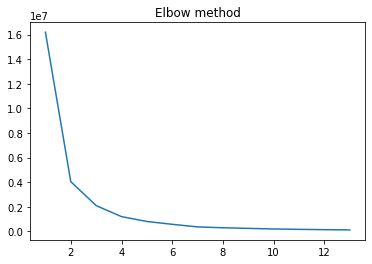

In [133]:
plt.plot(range(1,14),wcss)
plt.title('Elbow method')
plt.show()

In [19]:
#From the above graph we can decide that the optimum number of cluster is 2.

In [134]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [135]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [136]:
#silhouette_score

from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.6599516439224017


# Agglomerative HC

In [23]:
#Plotting Dendogram

In [24]:
import scipy.cluster.hierarchy as sch

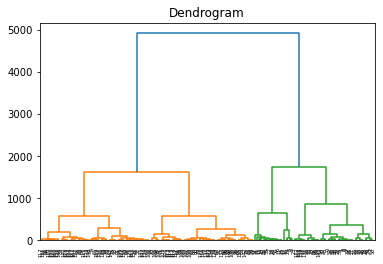

In [137]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title("Dendrogram")
plt.show()

In [138]:
#From the above Dendrogram we can decide that the optimum number of cluster is 2.

In [ ]:
# Calculating silhouette_score:
from sklearn.cluster import AgglomerativeClustering

In [140]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [141]:
y_hc=hc.fit_predict(data)

In [142]:
silhouette_avg=silhouette_score(data,y_hc)
print(silhouette_avg)

0.6543246376053309


# PCA

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [147]:
scaled_data=sc.fit_transform(data)
scaled_data

array([[ 1.51516332, -0.57916566,  0.27093638, ...,  0.3833328 ,
         1.82809675,  0.98217445],
       [ 0.20964771, -0.51250719, -0.93153695, ...,  0.42947949,
         1.09692792,  0.93483012],
       [ 0.15894808,  0.03980581,  1.26608672, ...,  0.33718612,
         0.77352632,  1.36092915],
       ...,
       [ 0.29837208,  1.8681523 , -0.43396178, ..., -1.69326819,
        -1.49028487,  0.25622795],
       [ 0.17162299,  0.25882648,  0.02214879, ..., -1.6471215 ,
        -1.40591924,  0.27200939],
       [ 1.38841423,  1.69674482,  1.5563389 , ..., -1.60097481,
        -1.43404112, -0.61175157]])

In [148]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [149]:
type(scaled_data)

pandas.core.frame.DataFrame

In [150]:
scaled_data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929


In [151]:
from sklearn.decomposition import PCA

In [152]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(scaled_data)

In [153]:
pca.explained_variance_ratio_

array([0.38552403, 0.20659478, 0.09511346, 0.06982522, 0.0570396 ,
       0.0430487 , 0.03540683, 0.02650788, 0.02392518, 0.02007854])

In [154]:
np.sum(pca.explained_variance_ratio_)

0.9630642071378281

# DBSCAN

In [155]:
from sklearn.cluster import DBSCAN

In [156]:
eps=3 #setting DBSCAN hyperparameters
min_samples=20

In [157]:
#fit DBSCAN
dbscan=DBSCAN(eps=eps,min_samples=min_samples)
y_dbscan=dbscan.fit_predict(scaled_data)

In [159]:
data["DBSCAN_Cluster"]=y_dbscan

In [160]:
data1=data[data["DBSCAN_Cluster"]==0]    #Cluster 0 datapoints
data2=data[data["DBSCAN_Cluster"]==1]    #Cluster 1 datapoints
data3=data[data["DBSCAN_Cluster"]==-1]   #Cluster 2 datapoints

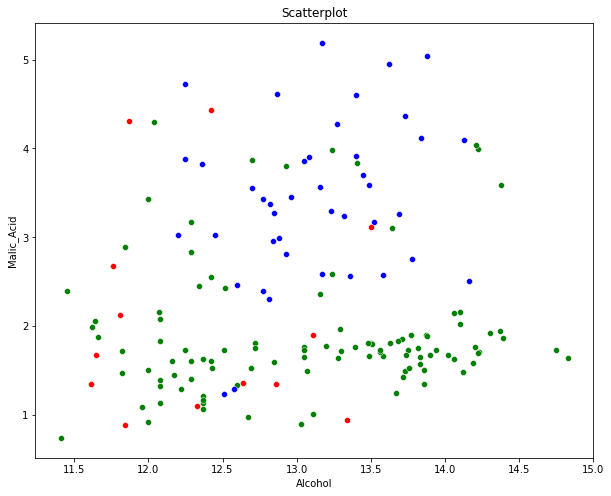

In [163]:
#Since Alchol and Malic_Acid are the main ingrediant in wine it is plotted below
#We can also plot any ingrident with other
plt.figure(figsize=(10,8))
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=data1,color='green')
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=data2,color='blue')
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=data3,color='red')
plt.title('Scatterplot')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [164]:
#Mean silhouette coefficient

silhouette_avg = silhouette_score(scaled_data,y_dbscan)
silhouette_avg

0.21620005928195898